## Random Forest - Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.000,2013.628,2.892,2003.000,2012.000,2014.000,2016.000,2018.000
Selling_Price,301.000,4.661,5.083,0.100,0.900,3.600,6.000,35.000
Present_Price,301.000,7.628,8.644,0.320,1.200,6.400,9.900,92.600
Kms_Driven,301.000,36947.206,38886.884,500.000,15000.000,32000.000,48767.000,500000.000
Owner,301.000,0.043,0.248,0.000,0.000,0.000,0.000,3.000


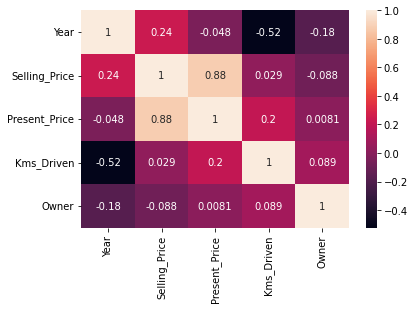

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [9]:
df["vehicle_age"]=2021-df.Year

In [10]:
df.Car_Name.value_counts() # Too many unique. We will try without dropping and with dropping.

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [11]:
df.drop(columns=["Year"], inplace=True)

In [12]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,3.350,5.590,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.750,9.540,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.250,9.850,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.850,4.150,5200,Petrol,Dealer,Manual,0,10
4,swift,4.600,6.870,42450,Diesel,Dealer,Manual,0,7


## Train test split

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

__Encoder__

Since our model is a tree-based model, we will apply the Label/Ordinal encoder operation instead of Dummies/OneHotEncoder

In [15]:
cat = X.select_dtypes("object").columns
cat

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [16]:
X[cat].head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [17]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,90.000,5.590,27000,2.000,0.000,1.000,0,7
1,93.000,9.540,43000,1.000,0.000,1.000,0,8
2,68.000,9.850,6900,2.000,0.000,1.000,0,4
3,96.000,4.150,5200,2.000,0.000,1.000,0,10
4,92.000,6.870,42450,1.000,0.000,1.000,0,7


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

In [19]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


## Modeling for Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # We will use DecisionTreeRegressor but I also called DecisionTreeClassifier too.

In [21]:
DT_model = DecisionTreeRegressor(random_state=101) # With default parameters.

In [22]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [24]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# Our score function

In [25]:
train_val(DT_model, X_train, y_train, X_test, y_test) # There might be overfitting.

,train,test
R2,1.000,0.952
mae,0.000,0.603
mse,0.000,1.283
rmse,0.000,1.133


In [34]:
y_train_pred = DT_model.predict(X_train)

In [35]:
pd.DataFrame({'Actual Values' : y_train , 'Our Precit' : y_train_pred}).sample(10) # Its impossible. There must be overfitting. I'm sure now.

,Actual Values,Our Precit
19,2.650,2.650
287,5.750,5.750
280,5.250,5.250
164,0.450,0.450
10,2.850,2.850
273,2.250,2.250
288,8.400,8.400
153,0.500,0.500
104,1.350,1.350
65,4.750,4.750


In [ ]:
# DT with dummies score below. OrdinalEncoder works better but both has same overfitting problem.

__Cross Validate__

In [36]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

# We see that %89 train r2 with cross validating. Not %100 like above. There must be overfit.

test_r2                             0.891
test_neg_mean_absolute_error       -0.787
test_neg_mean_squared_error        -2.748
test_neg_root_mean_squared_error   -1.457
dtype: float64

## Feature Importances

In [37]:
DT_model.feature_importances_

array([9.18365194e-03, 8.94444598e-01, 4.78756069e-03, 7.75109283e-04,
       2.82862694e-04, 7.56380773e-04, 3.41291861e-05, 8.97357073e-02])

In [38]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
Owner,0.000
Seller_Type,0.000
Transmission,0.001
Fuel_Type,0.001
Kms_Driven,0.005
Car_Name,0.009
vehicle_age,0.090
Present_Price,0.894


# Label/Ordinal encoder is important in tree base models

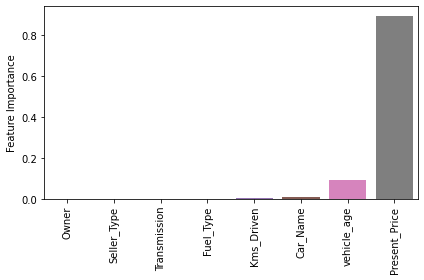

In [39]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

## Modeling for Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf_model = RandomForestRegressor(random_state=101 , max_features='sqrt') # We should definitely play around with the max feature parameter and change it. Otherwise it will be just like DT.


In [42]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', random_state=101)

In [43]:
train_val(rf_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.979,0.945
mae,0.308,0.581
mse,0.541,1.469
rmse,0.736,1.212


__Cross Validate__

In [64]:
from sklearn.model_selection import cross_validate, cross_val_score
model = RandomForestRegressor(random_state=101 , max_features = 'sqrt')
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.864
test_neg_mean_absolute_error       -0.821
test_neg_mean_squared_error        -4.210
test_neg_root_mean_squared_error   -1.634
dtype: float64

## Feature Importances

In [65]:
rf_model.feature_importances_

array([0.165233  , 0.43250954, 0.07587388, 0.09427663, 0.09177201,
       0.05405281, 0.00225164, 0.08403049])

In [66]:
df_f_i = pd.DataFrame(index=X.columns, data = rf_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
Owner,0.002
Transmission,0.054
Kms_Driven,0.076
vehicle_age,0.084
Seller_Type,0.092
Fuel_Type,0.094
Car_Name,0.165
Present_Price,0.433


In [67]:
# RF best in bagging models.
# Xgboost is the best in boosting.

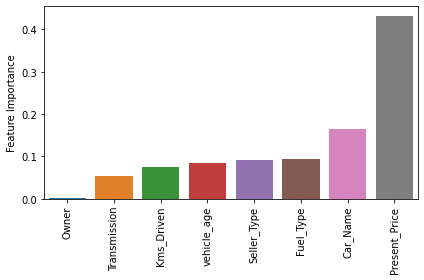

In [68]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

## Visualizing trees

In [83]:
from sklearn.tree import plot_tree

def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model.estimators_[15],filled=True, feature_names=X.columns, fontsize=10);

In [84]:
pruned_tree = RandomForestRegressor(n_estimators=250, max_depth=4, random_state=101,max_features='sqrt')
pruned_tree.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt', n_estimators=250,
                      random_state=101)



      train  test
R2    0.896 0.886
mae   0.970 1.013
mse   2.649 3.060
rmse  1.627 1.749




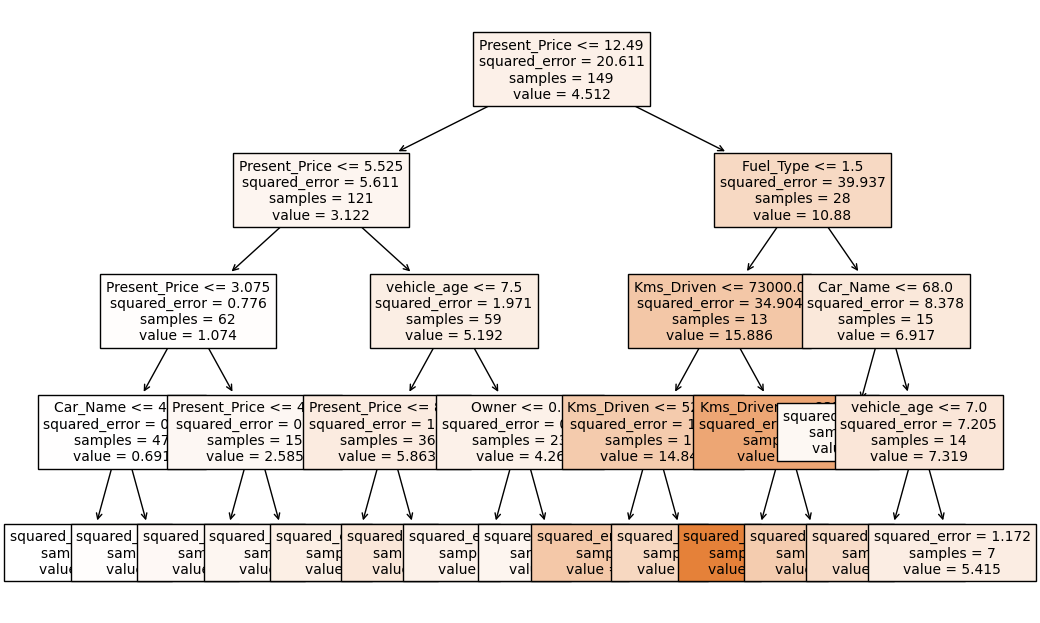

In [85]:
report_model(pruned_tree)

## GridSearch

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
model = RandomForestRegressor(random_state=101)

In [88]:
param_grid = {"n_estimators":[64, 128, 200, 500],     
              "max_depth": [None, 4, 5, 6, 7,8],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6],
              "max_features":['auto', df.columns.nunique()/3, 2, 4]}

In [89]:

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [90]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 3.0, 2, 4],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5, 6],
                         'n_estimators': [64, 128, 200, 500]},
             scoring='neg_root_mean_squared_error')

In [91]:
grid_model.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=128, random_state=101)

In [92]:
grid_model.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 128}

In [97]:
grid_score =pd.DataFrame(grid_model.cv_results_)
grid_score.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1531,1.277,0.096,0.084,0.011,8,4,4,5,500,"{'max_depth': 8, 'max_features': 4, 'min_sampl...",-0.825,-0.878,-1.211,-1.451,-0.912,-1.103,-3.250,-2.172,-0.826,-4.027,-1.665,1.073,539
1532,0.161,0.007,0.013,0.002,8,4,4,6,64,"{'max_depth': 8, 'max_features': 4, 'min_sampl...",-0.742,-0.928,-1.164,-1.523,-1.017,-1.107,-3.207,-2.209,-0.874,-4.392,-1.716,1.145,645
1533,0.318,0.010,0.023,0.002,8,4,4,6,128,"{'max_depth': 8, 'max_features': 4, 'min_sampl...",-0.776,-0.926,-1.200,-1.462,-1.014,-1.184,-3.294,-2.039,-0.870,-4.279,-1.704,1.118,634
1534,0.527,0.019,0.037,0.006,8,4,4,6,200,"{'max_depth': 8, 'max_features': 4, 'min_sampl...",-0.787,-0.919,-1.247,-1.448,-0.920,-1.184,-3.273,-2.067,-0.798,-4.125,-1.677,1.090,577
1535,1.272,0.090,0.075,0.007,8,4,4,6,500,"{'max_depth': 8, 'max_features': 4, 'min_sampl...",-0.825,-0.878,-1.211,-1.451,-0.912,-1.103,-3.250,-2.172,-0.826,-4.027,-1.665,1.073,539


In [96]:
grid_model.best_index_

193

In [98]:
grid_model.best_score_

-1.4440454270480765

In [99]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.982,0.960
mae,0.257,0.530
mse,0.459,1.078
rmse,0.678,1.038


__Cross Validate__

In [103]:
from sklearn.model_selection import cross_validate, cross_val_score

model = RandomForestRegressor(random_state=101, max_depth = None,
             max_features= 4,
             min_samples_leaf = 1,
             min_samples_split= 2,
             n_estimators= 200)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.894
test_neg_mean_absolute_error       -0.719
test_neg_mean_squared_error        -3.129
test_neg_root_mean_squared_error   -1.454
dtype: float64

In [104]:
y_pred = grid_model.predict(X_test)
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [105]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
181,0.300,0.379,-0.079
99,9.650,10.124,-0.474
132,0.750,0.800,-0.050
62,18.750,19.805,-1.055
220,3.500,3.464,0.036
49,7.750,7.745,0.005
226,5.250,4.613,0.637
66,19.750,14.398,5.352
265,6.500,7.311,-0.811
21,4.900,5.727,-0.827


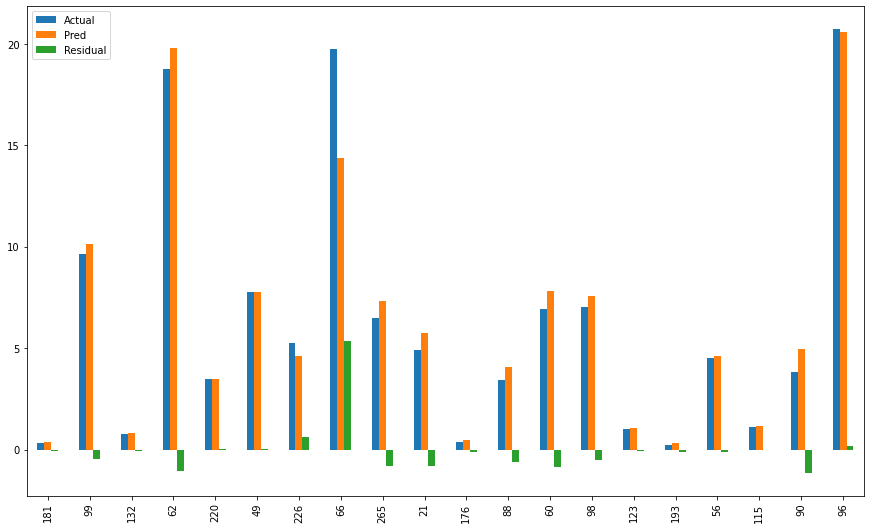

In [106]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

In [107]:
# Done